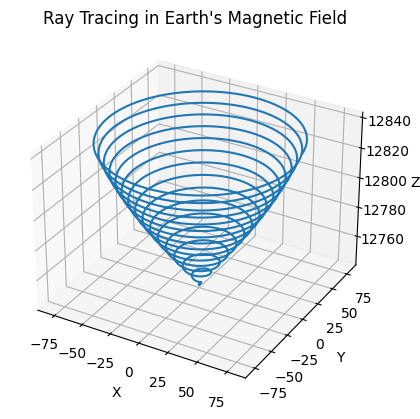

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions
r = 6371.0*2  # Earth radius in kilometers
mu = 1.0  # Initial refractive index
rho_r = 0.1  # Initial derivative of refractive index with respect to r
rho_theta = 0.1  # Initial derivative of refractive index with respect to theta
rho_phi = 0.1  # Initial derivative of refractive index with respect to phi
dr_dt = 0.0  # Initial derivative of r with respect to time
dtheta_dt = 0.1  # Initial derivative of theta with respect to time
dphi_dt = 0.1  # Initial derivative of phi with respect to time

# Define the time step and maximum number of steps
dt = 0.01  # Time step size
max_steps = 100000  # Maximum number of steps

# Define arrays to store the trajectory
r_values = [r]
theta_values = [0.0]
phi_values = [0.0]

# Perform the ray tracing
for step in range(max_steps):
    # Calculate the derivatives
    denominator = r * mu**2 * np.sin(theta_values[-1])
    
    if denominator != 0:
        dphi_dt = (1 / denominator) * (rho_phi - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r -
                                       mu * r * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_theta)
    else:
        dphi_dt = 0.0
    
    # Update the variables
    dr_dt = (1 / mu**2) * (rho_r - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_theta -
                           mu * np.sin(theta_values[-1]) * np.sin(theta_values[-1]) * rho_phi)
    dtheta_dt = (1 / (r * mu**2)) * (rho_theta - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r -
                                     mu * r * np.sin(theta_values[-1]) * np.sin(theta_values[-1]) * rho_phi)
    
    # Update the variables
    r += dr_dt * dt
    theta = theta_values[-1] + dtheta_dt * dt
    phi = phi_values[-1] + dphi_dt * dt
    
    # Append the new values to the arrays
    r_values.append(r)
    theta_values.append(theta)
    phi_values.append(phi)
    
    # Check if the ray has reached the end or escaped to infinity
    if r <= 0 or r >= 2 * r:
        break

# Convert the spherical coordinates to Cartesian coordinates
x_values = r_values * np.sin(theta_values) * np.cos(phi_values)
y_values = r_values * np.sin(theta_values) * np.sin(phi_values)
z_values = r_values * np.cos(theta_values)

# Plot the ray trace
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_values, y_values, z_values)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ray Tracing in Earth\'s Magnetic Field')
plt.show()


In [5]:
x_values

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
theta_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

/tmp/ipykernel_31423/2859667583.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  dphi_dt = (1 / (r * mu**2 * np.sin(theta_values[-1]))) * (rho_phi - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r -
/tmp/ipykernel_31423/2859667583.py:30: RuntimeWarning: invalid value encountered in scalar multiply
  dphi_dt = (1 / (r * mu**2 * np.sin(theta_values[-1]))) * (rho_phi - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r -


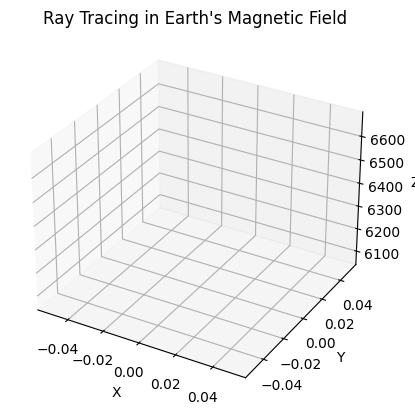

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions
r = 6371.0  # Earth radius in kilometers
mu = 1.0  # Initial refractive index
rho_r = 0.0  # Initial derivative of refractive index with respect to r
rho_theta = 0.0  # Initial derivative of refractive index with respect to theta
rho_phi = 0.0  # Initial derivative of refractive index with respect to phi
dr_dt = 0.0  # Initial derivative of r with respect to time
dtheta_dt = 0.0  # Initial derivative of theta with respect to time
dphi_dt = 0.0  # Initial derivative of phi with respect to time

# Define the time step and maximum number of steps
dt = 0.01  # Time step size
max_steps = 10000  # Maximum number of steps

# Define arrays to store the trajectory
r_values = [r]
theta_values = [0.0]
phi_values = [0.0]

# Perform the ray tracing
for step in range(max_steps):
    # Calculate the derivatives
    dr_dt = (1 / mu**2) * (rho_r - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_theta - 
                           mu * np.sin(theta_values[-1]) * np.sin(theta_values[-1]) * rho_phi)
    dtheta_dt = (1 / (r * mu**2)) * (rho_theta - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r - 
                                     mu * r * np.sin(theta_values[-1]) * np.sin(theta_values[-1]) * rho_phi)
    dphi_dt = (1 / (r * mu**2 * np.sin(theta_values[-1]))) * (rho_phi - mu * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_r - 
                                                               mu * r * np.cos(theta_values[-1]) * np.sin(theta_values[-1]) * rho_theta)
    
    # Update the variables
    r += dr_dt * dt
    theta = theta_values[-1] + dtheta_dt * dt
    phi = phi_values[-1] + dphi_dt * dt
    
    # Append the new values to the arrays
    r_values.append(r)
    theta_values.append(theta)
    phi_values.append(phi)
    
    # Check if the ray has reached the end or escaped to infinity
    if r <= 0 or r >= 2 * r:
        break

# Convert the spherical coordinates to Cartesian coordinates
x_values = r_values * np.sin(theta_values) * np.cos(phi_values)
y_values = r_values * np.sin(theta_values) * np.sin(phi_values)
z_values = r_values * np.cos(theta_values)

# Plot the ray trace
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_values, y_values, z_values)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ray Tracing in Earth\'s Magnetic Field')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dipole_ray_tracing():
    # Constants
    r0 = 6370  # Reference radius distance in km
    f = 1  # Frequency in Hz
    B0 = 1  # Field intensity of the static magnetic field
    e = 1.602e-19  # Charge of an electron in C
    epsilon0 = 8.854e-12  # Dielectric constant in vacuum
    M = 9.109e-31  # Mass of an electron in kg
    c = 3e8  # Speed of light in m/s
    
    # Initial conditions
    r = 6371  # Initial geocentric distance in km
    theta = np.pi / 2  # Initial colatitude in radians
    phi = 0  # Initial longitude in radians
    rho_r = 0  # Initial value of dr/dt
    rho_theta = 0  # Initial value of dtheta/dt
    rho_phi = 0  # Initial value of dphi/dt
    t = 0  # Initial time in seconds
    
    # Lists to store the ray trace coordinates
    trace_r = [r]
    trace_theta = [theta]
    trace_phi = [phi]
    
    while r > r0:
        # Calculate the refractive index squared
        X = f**2 / f**2
        Y = B0 * e / M
        A = 1 - X
        B = -(X * (1 + X) + Y**2)
        C = Y**2 * X
        
        # Calculate the refractive index squared
        if B > 0:
            mu_squared = (-B - np.sqrt(B**2 - 4 * A * C)) / (2 * A)
        else:
            mu_squared = 2 * C / (-B + np.sqrt(B**2 - 4 * A * C))
        
        mu = np.sqrt(mu_squared)
        
        # Calculate the derivatives
        dr_dt = 1 / mu**2 * (rho_r - mu * (rho_r * np.cos(theta) - rho_theta * np.sin(theta)))
        dtheta_dt = 1 / (r * mu**2) * (rho_theta - mu * (rho_r * np.sin(theta) + rho_theta * np.cos(theta)))
        dphi_dt = 1 / (r * mu**2 * np.sin(theta)) * (rho_phi - mu * rho_phi * np.cos(theta) - r * rho_phi * dtheta_dt * np.sin(theta))
        drho_r_dt = 1 / mu * dr_dt + rho_theta * dtheta_dt + rho_phi * dphi_dt * np.sin(theta)
        drho_theta_dt = 1 / r * (1 / mu * dtheta_dt - rho_r * dr_dt + r * rho_phi * dphi_dt * np.cos(theta))
        drho_phi_dt = 1 / (r * np.sin(theta)) * (1 / mu * dphi_dt - rho_phi * dr_dt * np.sin(theta) - r * rho_phi * dtheta_dt * np.cos(theta))
        
        # Update the coordinates and time
        r += dr_dt * t
        theta += dtheta_dt * t
        phi += dphi_dt * t
        rho_r += drho_r_dt * t
        rho_theta += drho_theta_dt * t
        rho_phi += drho_phi_dt * t
        t += 1  # Time step in seconds
        
        # Append the coordinates to the trace
        trace_r.append(r)
        trace_theta.append(theta)
        trace_phi.append(phi)
    
    return trace_r, trace_theta, trace_phi

# Perform ray tracing
trace_r, trace_theta, trace_phi = dipole_ray_tracing()

# Convert spherical coordinates to Cartesian coordinates
x = trace_r * np.sin(trace_theta) * np.cos(trace_phi)
y = trace_r * np.sin(trace_theta) * np.sin(trace_phi)
z = trace_r * np.cos(trace_theta)

# Plot the ray trace
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ray Trace in Dipole Coordinate System')

# Show the plot
plt.show()


KeyboardInterrupt: 